In [1]:
!pip install Sentencepiece
!pip install transformers

  Using cached transformers-4.25.1-py3-none-any.whl (5.8 MB)
  Using cached huggingface_hub-0.11.1-py3-none-any.whl (182 kB)
  Using cached filelock-3.9.0-py3-none-any.whl (9.7 kB)
  Using cached tokenizers-0.13.2.tar.gz (359 kB)
  Installing build dependencies ... ^C
canceled
ERROR: Operation cancelled by user


In [ ]:
!pip install wordcloud

In [ ]:
!pip install --upgrade tensorflow_hub

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gretasimeliunaite/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/gretasimeliunaite/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/gretasimeliunaite/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/gretasimeliunaite/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/gretasimeliunaite/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import pandas as pd
import tensorflow_hub as hub
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import re
import unicodedata
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import string
# ignoring all the warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
url = 'https://raw.githubusercontent.com/Greta12321/Sentiment_analysis_2022_12/main/russia_war_data_sample-2.csv'
data = pd.read_csv(url, lineterminator='\n')

## Defined functions

- strip emoji

In [ ]:
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

## Start Exploring DataSet

In [ ]:
data['created_at'] = pd.to_datetime(data['created_at'])

In [ ]:
df = data[[ 'username', 'created_at','tweet','language']]

In [ ]:
df["language"].value_counts()

en    52353
Name: language, dtype: int64

In [ ]:
df.isnull().sum()

username      0
created_at    0
tweet         0
language      0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.head()

,username,created_at,tweet,language
0,xXOxygeNXx49,2022-09-05,@SupaIsaiah016 Yummy,en
1,Abraxas444,2022-09-06,Peace is offensive concept for some of #Ukrain...,en
2,iwdu_global,2022-09-05,Thanks to the @iwdu_global for another fruitfu...,en
3,VoteEarly2,2022-09-06,@RepLeeZeldin Trump sabotaging democracy &amp;...,en
4,UKikaski,2022-09-05,#APU Bayraktar TB-2's destroy two RUS Tor-M1 S...,en


## Clean & Stem The Tweets

## 1. Low Cleaning df['tweet_simple_clean']

In [ ]:
def clean_tweet(text):
    text = str(text).lower() # lowercase the text
    text = ' '.join([word for word in text.split() if not word.startswith('@')]) # get rid of usernames
    text = ' '.join([word for word in text.split() if not word.startswith('#')]) # get rid of hashtags
    text = re.sub('https?://\S+|www\.\S+', '', text) # remove urls
    text = BeautifulSoup(text, 'html.parser').string # parse any html and return it as a string
    if text is None:
        return ''
    text = re.sub('\[.*?\]', '', text)
    text = remove_emojis(text) # get rid of emojis
    text = re.sub('\n', '', text) # drop all line feeds
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) #remove punctuation . , ! ?
    # Remove all the special characters
    text = re.sub(r'\W', ' ', str(text))
 
    # remove all single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
 
    # Remove single characters from the start
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text) 
    text = re.sub(r'â', ' ', text)
    text = re.sub(r'ð', ' ', text)
    text = re.sub(r'º', ' ', text)
 
    # Substituting multiple spaces with single space
    text= re.sub(r'\s+', ' ', text, flags=re.I)
 
    # Removing prefixed 'b'
    text = re.sub(r'^b\s+', '', text)
    while text.find('  ') != -1:
        text = re.sub('\s\s', ' ', text) # strip double spaces
    return text.strip()

In [ ]:
df['tweet'].iloc[8831] # pre-cleaned tweet

'People evacuated to LPR, Russia from Kharkov Region due to shelling by Ukraine — official - #kharkov #ukraine #people #region #russia #moscow #world #kyiv https://t.co/jYojCsWHV4'

In [ ]:
stopword=set(stopwords.words('english'))

In [ ]:
df['tweet_simple_clean'] = df['tweet'].apply(clean_tweet)

In [ ]:
df['tweet_simple_clean'].iloc[8831] # tweet after cleaning

'people evacuated to lpr russia from kharkov region due to shelling by ukraine official'

In [ ]:
df['tweet'].iloc[47] # pre-cleaned tweet

'Armed Forces of Ukraine advance on Kramatorsk front, killing up to 100 occupiers near Kupiansk – General Staff | Ukrainska Pravda https://t.co/BDwlHNZgT5  #Ukraine  #UkraineRussiaWar #UkraineUnderAttack #UkraineWarNews'

In [ ]:
df['tweet_simple_clean'].iloc[47] # pre-cleaned tweet

'armed forces of ukraine advance on kramatorsk front killing up to 100 occupiers near kupiansk general staff ukrainska pravda'

## 2. Medium Cleaning df['tweet_no_stopwords']

In [ ]:
stop = stopwords.words('english') #Remove stopwords (and, or...)
df['tweet_no_stopwords'] = df['tweet_simple_clean'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['tweet_no_stopwords'].head()


0                                                yummy
1                    peace offensive concept officials
2    thanks another fruitful insightful meeting dis...
3    trump sabotaging democracy threatening natl se...
4    bayraktar tb2s destroy two rus torm1 sam syste...
Name: tweet_no_stopwords, dtype: object

In [ ]:
df['tweet_simple_clean'].iloc[40]

'johnsipher you were saying about honestywhat business do america and the uk have meddling in iran asking for and'

In [ ]:
df['tweet_no_stopwords'].iloc[40] # tweet after cleaning

'johnsipher saying honestywhat business america uk meddling iran asking'

## 3. High Cleaning df['tweet_high_clean']

NLTK Lemmatization is the process of grouping the inflected forms of a word in order to analyze them as a single word in linguistics.Unlike stemming, lemmatization uses the part of speech tags and the meaning of the word in the sentence to see the main context of the document. Thus, NLTK Lemmatization is important for understanding a text and using it for Natural Language Processing, and Natural Language Understanding practices. https://www.holisticseo.digital/python-seo/nltk/lemmatize

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')

lemmatizer = WordNetLemmatizer()

def nltk_pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatize_sentence(sentence):

    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    wordnet_tagged = map(lambda x: (x[0], nltk_pos_tagger(x[1])), nltk_tagged)
    lemmatized_sentence = []
    
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatized_sentence.append(word)
        else:        
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/gretasimeliunaite/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
df['tweet_high_clean'] = df['tweet_no_stopwords'].apply(lemmatize_sentence)

In [ ]:
df['tweet_no_stopwords'].iloc[47]

'armed forces ukraine advance kramatorsk front killing 100 occupiers near kupiansk general staff ukrainska pravda'

In [ ]:
df['tweet_high_clean'].iloc[47] # tweet after cleaning

'arm force ukraine advance kramatorsk front kill 100 occupier near kupiansk general staff ukrainska pravda'

In [ ]:
df['tweet_no_stopwords'].iloc[40]

'johnsipher saying honestywhat business america uk meddling iran asking'

In [ ]:
df['tweet_high_clean'].iloc[40]

'johnsipher say honestywhat business america uk meddling iran ask'

## Classify Sentiment

### Scoring tweets with simple cleaning

In [ ]:
sentiments = SentimentIntensityAnalyzer()

df['Positive'] = [sentiments.polarity_scores(i)['pos'] for i in df['tweet_simple_clean']]
df['Neutral'] = [sentiments.polarity_scores(i)['neu'] for i in df['tweet_simple_clean']]
df['Negative'] = [sentiments.polarity_scores(i)['neg'] for i in df['tweet_simple_clean']]
df['Compound'] = [sentiments.polarity_scores(i)['compound'] for i in df['tweet_simple_clean']]

In [ ]:
print(df['tweet_simple_clean'].iloc[47],'\n',df['Compound'].iloc[47])

armed forces of ukraine advance on kramatorsk front killing up to 100 occupiers near kupiansk general staff ukrainska pravda 
 -0.6597


In [ ]:
def classify_sentiment(row):
    classify = 'Neutral'
    if row['Compound'] >= 0.05:
        classify = 'Positive'
    elif row['Compound'] <= -0.05:
        classify = 'Negative'
    return classify

In [ ]:
df['Sentiment'] = df.apply(classify_sentiment, axis=1)

In [ ]:
pos = df['Sentiment'][df['Sentiment'] == 'Positive'].count()
neg = df['Sentiment'][df['Sentiment'] == 'Negative'].count()
neu = df['Sentiment'][df['Sentiment'] == 'Neutral'].count()
df['Sentiment'].value_counts()

Negative    20940
Positive    17934
Neutral     13479
Name: Sentiment, dtype: int64

In [ ]:
print('Ratio of Negative to Positive Tweets by Sentiment Count: {:.0f}:{:.0f} ({:.2f}:1)'.format(neg, pos, neg / pos))

Ratio of Negative to Positive Tweets by Sentiment Count: 20940:17934 (1.17:1)


In [ ]:
possible_label = df.Sentiment.unique()
dict_label = {}
for index,possible_label in enumerate(possible_label):
    dict_label[possible_label] = index
dict_label

{'Positive': 0, 'Negative': 1, 'Neutral': 2}

In [ ]:
df["Label"] = df["Sentiment"].replace(dict_label)

In [ ]:
df

,username,created_at,tweet,language,tweet_simple_clean,tweet_no_stopwords,tweet_high_clean,Positive,Neutral,Negative,Compound,Sentiment,Label
0,xXOxygeNXx49,2022-09-05,@SupaIsaiah016 Yummy,en,yummy,yummy,yummy,1.000,0.000,0.000,0.5267,Positive,0
1,Abraxas444,2022-09-06,Peace is offensive concept for some of #Ukrain...,en,peace is offensive concept for some of officials,peace offensive concept officials,peace offensive concept official,0.280,0.480,0.240,0.1280,Positive,0
2,iwdu_global,2022-09-05,Thanks to the @iwdu_global for another fruitfu...,en,thanks to the for another fruitful and insight...,thanks another fruitful insightful meeting dis...,thanks another fruitful insightful meeting dis...,0.268,0.732,0.000,0.8316,Positive,0
3,VoteEarly2,2022-09-06,@RepLeeZeldin Trump sabotaging democracy &amp;...,en,trump sabotaging democracy threatening natl se...,trump sabotaging democracy threatening natl se...,trump sabotage democracy threaten natl securit...,0.122,0.623,0.255,-0.6908,Negative,1
4,UKikaski,2022-09-05,#APU Bayraktar TB-2's destroy two RUS Tor-M1 S...,en,bayraktar tb2s destroy two rus torm1 sam syste...,bayraktar tb2s destroy two rus torm1 sam syste...,bayraktar tb2s destroy two ru torm1 sam system...,0.045,0.714,0.241,-0.8126,Negative,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52348,anno1540,2022-11-05,"Today, close to 4:00 p.m., two Kalibr missiles...",en,today close to 400 pm two kalibr missiles were...,today close 400 pm two kalibr missiles shot pp...,today close 400 pm two kalibr missile shoot pp...,0.000,1.000,0.000,0.0000,Neutral,2
52349,TeslaradarB,2022-11-04,Yay! TreePuncher just spotted a 2021 Tesla Mod...,en,yay treepuncher just spotted 2021 tesla model ...,yay treepuncher spotted 2021 tesla model p2 du...,yay treepuncher spot 2021 tesla model p2 dual ...,0.279,0.721,0.000,0.7351,Positive,0
52350,OneginRaul,2022-11-05,@KimDotcom The only one that can supply cheap ...,en,the only one that can supply cheap energy to i...,one supply cheap energy absolutely nobody offe...,one supply cheap energy absolutely nobody offe...,0.278,0.722,0.000,0.6124,Positive,0
52351,Trust_In_Noto,2022-11-04,@AOC You know you want to support this. #Biden...,en,you know you want to support this,know want support,know want support,0.444,0.556,0.000,0.4588,Positive,0


In [ ]:
pd.DataFrame(df.groupby(['Sentiment'])['Sentiment'].count()).rename(columns={"Sentiment":"Counts"}).assign(
    Percentage=lambda x: (x.Counts/ x.Counts.sum())*100)

,Counts,Percentage
Sentiment,,
Negative,20940,39.997708
Neutral,13479,25.746376
Positive,17934,34.255917


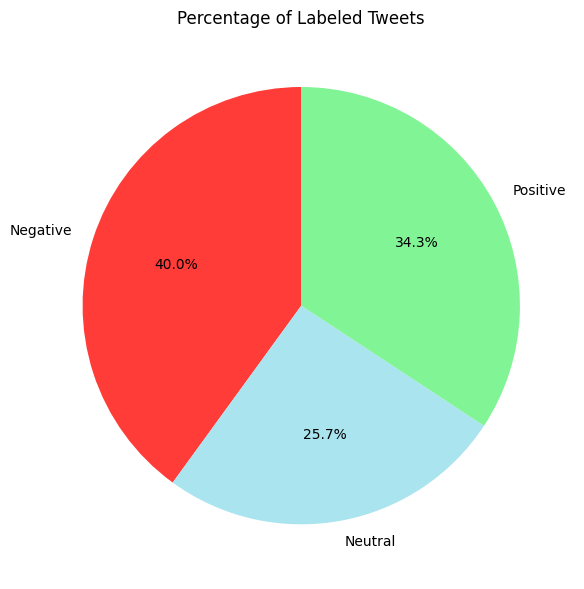

In [ ]:
x = pd.DataFrame(df.groupby(['Sentiment'])['Sentiment'].count()).rename(columns={"Sentiment":"Counts"})
labels = ['Negative','Neutral','Positive']
colors = ["#FF3C38","#A9E4EF","#81F495"]
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(x["Counts"], labels=labels, autopct='%.1f%%', colors=colors, startangle=90)
ax.set_title("Percentage of Labeled Tweets")
plt.tight_layout()

## Bert

In [ ]:
df

,username,created_at,tweet,language,tweet_simple_clean,tweet_no_stopwords,tweet_high_clean,Positive,Neutral,Negative,Compound,Sentiment,Label
0,xXOxygeNXx49,2022-09-05,@SupaIsaiah016 Yummy,en,yummy,yummy,yummy,1.000,0.000,0.000,0.5267,Positive,0
1,Abraxas444,2022-09-06,Peace is offensive concept for some of #Ukrain...,en,peace is offensive concept for some of officials,peace offensive concept officials,peace offensive concept official,0.280,0.480,0.240,0.1280,Positive,0
2,iwdu_global,2022-09-05,Thanks to the @iwdu_global for another fruitfu...,en,thanks to the for another fruitful and insight...,thanks another fruitful insightful meeting dis...,thanks another fruitful insightful meeting dis...,0.268,0.732,0.000,0.8316,Positive,0
3,VoteEarly2,2022-09-06,@RepLeeZeldin Trump sabotaging democracy &amp;...,en,trump sabotaging democracy threatening natl se...,trump sabotaging democracy threatening natl se...,trump sabotage democracy threaten natl securit...,0.122,0.623,0.255,-0.6908,Negative,1
4,UKikaski,2022-09-05,#APU Bayraktar TB-2's destroy two RUS Tor-M1 S...,en,bayraktar tb2s destroy two rus torm1 sam syste...,bayraktar tb2s destroy two rus torm1 sam syste...,bayraktar tb2s destroy two ru torm1 sam system...,0.045,0.714,0.241,-0.8126,Negative,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52348,anno1540,2022-11-05,"Today, close to 4:00 p.m., two Kalibr missiles...",en,today close to 400 pm two kalibr missiles were...,today close 400 pm two kalibr missiles shot pp...,today close 400 pm two kalibr missile shoot pp...,0.000,1.000,0.000,0.0000,Neutral,2
52349,TeslaradarB,2022-11-04,Yay! TreePuncher just spotted a 2021 Tesla Mod...,en,yay treepuncher just spotted 2021 tesla model ...,yay treepuncher spotted 2021 tesla model p2 du...,yay treepuncher spot 2021 tesla model p2 dual ...,0.279,0.721,0.000,0.7351,Positive,0
52350,OneginRaul,2022-11-05,@KimDotcom The only one that can supply cheap ...,en,the only one that can supply cheap energy to i...,one supply cheap energy absolutely nobody offe...,one supply cheap energy absolutely nobody offe...,0.278,0.722,0.000,0.6124,Positive,0
52351,Trust_In_Noto,2022-11-04,@AOC You know you want to support this. #Biden...,en,you know you want to support this,know want support,know want support,0.444,0.556,0.000,0.4588,Positive,0


In [ ]:
!pip install transformers
from transformers import BertTokenizer
from torch.utils.data import TensorDataset

https://www.kaggle.com/code/harshjain123/bert-for-everyone-tutorial-implementation 


### **Bert**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

In [ ]:
batch_1 = df[:2000]

In [ ]:
batch_1

,username,created_at,tweet,language,tweet_simple_clean,tweet_no_stopwords,tweet_high_clean,Positive,Neutral,Negative,Compound,Sentiment,Label
0,xXOxygeNXx49,2022-09-05,@SupaIsaiah016 Yummy,en,yummy,yummy,yummy,1.000,0.000,0.000,0.5267,Positive,0
1,Abraxas444,2022-09-06,Peace is offensive concept for some of #Ukrain...,en,peace is offensive concept for some of officials,peace offensive concept officials,peace offensive concept official,0.280,0.480,0.240,0.1280,Positive,0
2,iwdu_global,2022-09-05,Thanks to the @iwdu_global for another fruitfu...,en,thanks to the for another fruitful and insight...,thanks another fruitful insightful meeting dis...,thanks another fruitful insightful meeting dis...,0.268,0.732,0.000,0.8316,Positive,0
3,VoteEarly2,2022-09-06,@RepLeeZeldin Trump sabotaging democracy &amp;...,en,trump sabotaging democracy threatening natl se...,trump sabotaging democracy threatening natl se...,trump sabotage democracy threaten natl securit...,0.122,0.623,0.255,-0.6908,Negative,1
4,UKikaski,2022-09-05,#APU Bayraktar TB-2's destroy two RUS Tor-M1 S...,en,bayraktar tb2s destroy two rus torm1 sam syste...,bayraktar tb2s destroy two rus torm1 sam syste...,bayraktar tb2s destroy two ru torm1 sam system...,0.045,0.714,0.241,-0.8126,Negative,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,SavchukAlex,2022-11-22,#Ukraine receives modernized high-precision Br...,en,receives modernized highprecision brimstone 2 ...,receives modernized highprecision brimstone 2 ...,receives modernize highprecision brimstone 2 m...,0.292,0.708,0.000,0.7650,Positive,0
1996,nigethugrug,2022-11-22,Care to comment @awb58 @BenjaminAChilds ?\n\n...,en,care to comment sweetheart energy deals caused...,care comment sweetheart energy deals caused fr...,care comment sweetheart energy deal cause fran...,0.295,0.668,0.037,0.8765,Positive,0
1997,bloomsbury1918,2022-11-22,European Parliament will deal with a project t...,en,european parliament will deal with project to ...,european parliament deal project declare terro...,european parliament deal project declare terro...,0.111,0.677,0.212,-0.4989,Negative,1
1998,10WallStreet,2022-11-22,Ultimately #Catholic #NeoNazis Will Destroy Al...,en,ultimately will destroy all holy sites of chur...,ultimately destroy holy sites church,ultimately destroy holy site church,0.000,0.696,0.304,-0.5423,Negative,1


In [ ]:
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')


# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
tokenized = batch_1["tweet_simple_clean"].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

In [ ]:
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])

In [ ]:
padded

array([[  101,  9805, 18879, ...,     0,     0,     0],
       [  101,  3521,  2003, ...,     0,     0,     0],
       [  101,  4283,  2000, ...,     0,     0,     0],
       ...,
       [  101,  2647,  3323, ...,     0,     0,     0],
       [  101,  4821,  2097, ...,     0,     0,     0],
       [  101,  2009,  2003, ...,     0,     0,     0]])

In [ ]:
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

(2000, 65)

In [ ]:
input_ids = torch.tensor(padded)  
attention_mask = torch.tensor(attention_mask)

with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

In [ ]:
features = last_hidden_states[0][:,0,:].numpy()

In [ ]:
labels = batch_1['Label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, 
                                                    test_size=0.2,
                                                   random_state=100,
                                                    stratify=labels)

Bert with Logistic regression without fine-tunning

In [ ]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_train, y_train)
predictions = lr_clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score, recall_score, f1_score

print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

[[104  23  11]
 [ 31 117  15]
 [ 20  12  67]]
              precision    recall  f1-score   support

           0       0.67      0.75      0.71       138
           1       0.77      0.72      0.74       163
           2       0.72      0.68      0.70        99

    accuracy                           0.72       400
   macro avg       0.72      0.72      0.72       400
weighted avg       0.72      0.72      0.72       400

Model evaluation
Accuracy: 0.72


Bert with Logistic regression with fine-tunning

In [ ]:
lr_clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
!pip install scikit-optimize

In [ ]:
from skopt import BayesSearchCV
parameters = {'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
log_reg_model = LogisticRegression()

cv = BayesSearchCV(log_reg_model, parameters)
cv.fit(X_train, y_train)
best_params = cv.best_params_
best_params



OrderedDict([('C', 0.4)])

In [ ]:
logistic = LogisticRegression(**best_params, class_weight='balanced', random_state = 42, 
                              max_iter=10000)

logistic.fit(X_train, y_train)
predictions = logistic.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score, recall_score, f1_score
 
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

[[103  19  16]
 [ 33 114  16]
 [ 16  11  72]]
              precision    recall  f1-score   support

           0       0.68      0.75      0.71       138
           1       0.79      0.70      0.74       163
           2       0.69      0.73      0.71        99

    accuracy                           0.72       400
   macro avg       0.72      0.72      0.72       400
weighted avg       0.73      0.72      0.72       400

Model evaluation
Accuracy: 0.7225


Bert with XGBoost without fine-tunning

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb


xgboost = XGBClassifier()
xgboost.fit(X_train, y_train)
xgboost.score(X_train, y_train)
predictions = xgboost.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

[[101  29   8]
 [ 32 126   5]
 [ 26  19  54]]
              precision    recall  f1-score   support

           0       0.64      0.73      0.68       138
           1       0.72      0.77      0.75       163
           2       0.81      0.55      0.65        99

    accuracy                           0.70       400
   macro avg       0.72      0.68      0.69       400
weighted avg       0.71      0.70      0.70       400

Model evaluation
Accuracy: 0.7025


Bert with XGBoost with fine-tunning

In [ ]:
xgboost.get_params()

{'objective': 'multi:softprob',
 'use_label_encoder': None,
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_threshold': 64,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 6,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': None,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [ ]:
parameters = {'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], 
              'subsample':[0.6, 0.7, 0.8, 0.9, 1], 
              'min_child_weight' : [0,1,2,3,4,5,6,7,8,9,10]}
xgboost_model = XGBClassifier()

cv = BayesSearchCV(xgboost_model, parameters)
cv.fit(X_train, y_train)
best_params = cv.best_params_
best_params


In [ ]:
xgboost= XGBClassifier(**best_params, class_weight='balanced', random_state = 42, 
                              max_iter=10000)

xgboost.fit(X_train, y_train)
predictions = xgboost.predict(X_test)

[22:50:00] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "class_weight", "max_iter" } are not used.



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score, recall_score, f1_score
 
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

[[101  26  11]
 [ 31 126   6]
 [ 27  19  53]]
              precision    recall  f1-score   support

           0       0.64      0.73      0.68       138
           1       0.74      0.77      0.75       163
           2       0.76      0.54      0.63        99

    accuracy                           0.70       400
   macro avg       0.71      0.68      0.69       400
weighted avg       0.71      0.70      0.70       400

Model evaluation
Accuracy: 0.7


Bert with Naïve Bayes without fine-tunning

In [ ]:
from sklearn.naive_bayes import GaussianNB
text_classifier = GaussianNB()
text_classifier.fit(X_train, y_train)
text_classifier.score(X_train, y_train)
predictions = text_classifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

[[ 80  25  33]
 [ 37 104  22]
 [ 17  21  61]]
              precision    recall  f1-score   support

           0       0.60      0.58      0.59       138
           1       0.69      0.64      0.66       163
           2       0.53      0.62      0.57        99

    accuracy                           0.61       400
   macro avg       0.61      0.61      0.61       400
weighted avg       0.62      0.61      0.61       400

Model evaluation
Accuracy: 0.6125


Bert with Naïve Bayes with fine-tunning

In [ ]:
text_classifier.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [ ]:
parameters = {'var_smoothing': np.logspace(0,-9, num=100)}
text_classifier = GaussianNB()

cv = BayesSearchCV(text_classifier, parameters)
cv.fit(X_train, y_train)
best_params = cv.best_params_
best_params

OrderedDict([('var_smoothing', 0.0004328761281083057)])

In [ ]:
 text_classifier = GaussianNB(**best_params)

text_classifier.fit(X_train, y_train)
predictions = text_classifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

[[ 80  25  33]
 [ 36 105  22]
 [ 17  21  61]]
              precision    recall  f1-score   support

           0       0.60      0.58      0.59       138
           1       0.70      0.64      0.67       163
           2       0.53      0.62      0.57        99

    accuracy                           0.61       400
   macro avg       0.61      0.61      0.61       400
weighted avg       0.62      0.61      0.62       400

Model evaluation
Accuracy: 0.615


**RoBerta**

In [ ]:
from transformers import RobertaTokenizer, RobertaModel
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaModel.from_pretrained('roberta-base')

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
tokenized = batch_1["tweet_simple_clean"].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

In [ ]:
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])


In [ ]:
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

(2000, 67)

In [ ]:
input_ids = torch.tensor(padded)  
attention_mask = torch.tensor(attention_mask)

with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

KeyboardInterrupt: 

In [ ]:
features = last_hidden_states[0][:,0,:].numpy()

In [ ]:
labels = batch_1['Label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, 
                                                    test_size=0.2,
                                                   random_state=100,
                                                    stratify=labels)

Robert with logistic regression without fine-tunning.

In [ ]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_train, y_train)
predictions = lr_clf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

Robert with logistic regression with fine-tunning.

In [ ]:
parameters = {'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
log_reg_model = LogisticRegression()

cv = BayesSearchCV(log_reg_model, parameters)
cv.fit(X_train, y_train)
best_params = cv.best_params_
best_params

In [ ]:
logistic = LogisticRegression(**best_params, class_weight='balanced', random_state = 42, 
                              max_iter=10000)

logistic.fit(X_train, y_train)
predictions = logistic.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

Robert with XGBoost without fine-tuning. 

In [ ]:
xgboost = XGBClassifier()
xgboost.fit(X_train, y_train)
xgboost.score(X_train, y_train)
predictions = xgboost.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

Robert with XGBoost with fine-tuning.

In [ ]:
parameters = {'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], 
              'subsample':[0.6, 0.7, 0.8, 0.9, 1], 
              'min_child_weight' : [0,1,2,3,4,5,6,7,8,9,10]}
xgboost_model = XGBClassifier()

cv = BayesSearchCV(xgboost_model, parameters)
cv.fit(X_train, y_train)
best_params = cv.best_params_
best_params

In [ ]:
xgboost= XGBClassifier(**best_params, class_weight='balanced', random_state = 42, 
                              max_iter=10000)

xgboost.fit(X_train, y_train)
predictions = xgboost.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

Roberta with Naive Bayes without fine-tuning. 


In [ ]:
text_classifier = GaussianNB()
text_classifier.fit(X_train, y_train)
text_classifier.score(X_train, y_train)
predictions = text_classifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

Roberta with Naive Bayes with fine-tuning.

In [ ]:
parameters = {'var_smoothing': np.logspace(0,-9, num=100)}
text_classifier = GaussianNB()

cv = BayesSearchCV(text_classifier, parameters)
cv.fit(X_train, y_train)
best_params = cv.best_params_
best_params

In [ ]:
text_classifier = GaussianNB(**best_params)

text_classifier.fit(X_train, y_train)
predictions = text_classifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

**Alberta**


In [ ]:
from transformers import AlbertTokenizer, AlbertModel
tokenizer = AlbertTokenizer.from_pretrained('albert-base-v1')
model = AlbertModel.from_pretrained("albert-base-v1")

In [ ]:
tokenized = batch_1["tweet_simple_clean"].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

In [ ]:
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])


In [ ]:
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

In [ ]:
input_ids = torch.tensor(padded)  
attention_mask = torch.tensor(attention_mask)

with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

In [ ]:
features = last_hidden_states[0][:,0,:].numpy()

In [ ]:
labels = batch_1['Label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, 
                                                    test_size=0.2,
                                                   random_state=100,
                                                    stratify=labels)

Albert with logistic regression without fine-tuning. 



In [ ]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_train, y_train)
predictions = lr_clf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

Albert with logistic regression with fine-tuning. 


In [ ]:
parameters = {'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
log_reg_model = LogisticRegression()

cv = BayesSearchCV(log_reg_model, parameters)
cv.fit(X_train, y_train)
best_params = cv.best_params_
best_params

In [ ]:
logistic = LogisticRegression(**best_params, class_weight='balanced', random_state = 42, 
                              max_iter=10000)

logistic.fit(X_train, y_train)
predictions = logistic.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

Albert with XGBoost without fine-tuning.

In [ ]:
xgboost = XGBClassifier()
xgboost.fit(X_train, y_train)
xgboost.score(X_train, y_train)
predictions = xgboost.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

Albert with XGBoost with fine-tuning.

In [ ]:
parameters = {'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], 
              'subsample':[0.6, 0.7, 0.8, 0.9, 1], 
              'min_child_weight' : [0,1,2,3,4,5,6,7,8,9,10]}
xgboost_model = XGBClassifier()

cv = BayesSearchCV(xgboost_model, parameters)
cv.fit(X_train, y_train)
best_params = cv.best_params_
best_params

In [ ]:
xgboost= XGBClassifier(**best_params, class_weight='balanced', random_state = 42, 
                              max_iter=10000)

xgboost.fit(X_train, y_train)
predictions = xgboost.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

Albert with Naive Bayes without fine-tuning. 

In [ ]:
text_classifier = GaussianNB()
text_classifier.fit(X_train, y_train)
text_classifier.score(X_train, y_train)
predictions = text_classifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

Albert with Naive Bayes with fine-tuning. 

In [ ]:
parameters = {'var_smoothing': np.logspace(0,-9, num=100)}
text_classifier = GaussianNB()

cv = BayesSearchCV(text_classifier, parameters)
cv.fit(X_train, y_train)
best_params = cv.best_params_
best_params

In [ ]:
text_classifier = GaussianNB(**best_params)

text_classifier.fit(X_train, y_train)
predictions = text_classifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))



---



**BERT, Robert and Albert** 
- Classification models with fine-tuning on **tweet_high_clean**

**BERT**

In [ ]:
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')


# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
tokenized = batch_1["tweet_high_clean"].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

In [ ]:
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])

In [ ]:
padded

array([[  101, 10651,  2013, ...,     0,     0,     0],
       [  101,  2009,  2071, ...,     0,     0,     0],
       [  101,  3607,  2323, ...,     0,     0,     0],
       ...,
       [  101, 20277,  2480, ...,     0,     0,     0],
       [  101,  2204,  6735, ...,     0,     0,     0],
       [  101,  2065,  3607, ...,     0,     0,     0]])

In [ ]:
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

(2000, 85)

In [ ]:
input_ids = torch.tensor(padded)  
attention_mask = torch.tensor(attention_mask)

with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

In [ ]:
features = last_hidden_states[0][:,0,:].numpy()

In [ ]:
labels = batch_1['Label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, 
                                                    test_size=0.2,
                                                   random_state=100,
                                                    stratify=labels)

Bert and **Logistic Regression** with tuning on tweet_high_clean

In [ ]:
from skopt import BayesSearchCV
parameters = {'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
log_reg_model = LogisticRegression()

cv = BayesSearchCV(log_reg_model, parameters)
cv.fit(X_train, y_train)
best_params = cv.best_params_
best_params



KeyboardInterrupt: ignored

In [ ]:
logistic = LogisticRegression(**best_params, class_weight='balanced', random_state = 42, 
                              max_iter=10000)

logistic.fit(X_train, y_train)
predictions = logistic.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score, recall_score, f1_score
 
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

Bert with **XGBoost** with fine-tunning on tweet_high_clean

In [ ]:
parameters = {'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], 
              'subsample':[0.6, 0.7, 0.8, 0.9, 1], 
              'min_child_weight' : [0,1,2,3,4,5,6,7,8,9,10]}
xgboost_model = XGBClassifier()

cv = BayesSearchCV(xgboost_model, parameters)
cv.fit(X_train, y_train)
best_params = cv.best_params_
best_params


In [ ]:
xgboost= XGBClassifier(**best_params, class_weight='balanced', random_state = 42, 
                              max_iter=10000)

xgboost.fit(X_train, y_train)
predictions = xgboost.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score, recall_score, f1_score
 
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

Bert with **Naïve Bayes** with fine-tunning

In [ ]:
parameters = {'var_smoothing': np.logspace(0,-9, num=100)}
text_classifier = GaussianNB()

cv = BayesSearchCV(text_classifier, parameters)
cv.fit(X_train, y_train)
best_params = cv.best_params_
best_params

In [ ]:
 text_classifier = GaussianNB(**best_params)

text_classifier.fit(X_train, y_train)
predictions = text_classifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))



---



**ROBERT**

In [ ]:
from transformers import RobertaTokenizer, RobertaModel
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaModel.from_pretrained('roberta-base')

In [ ]:
tokenized = batch_1["tweet_high_clean"].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

In [ ]:
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])


In [ ]:
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

In [ ]:
input_ids = torch.tensor(padded)  
attention_mask = torch.tensor(attention_mask)

with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

In [ ]:
features = last_hidden_states[0][:,0,:].numpy()

In [ ]:
labels = batch_1['Label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, 
                                                    test_size=0.2,
                                                   random_state=100,
                                                    stratify=labels)

RoBert and **Logistic Regression** with tuning on tweet_high_clean

In [ ]:
parameters = {'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
log_reg_model = LogisticRegression()

cv = BayesSearchCV(log_reg_model, parameters)
cv.fit(X_train, y_train)
best_params = cv.best_params_
best_params

In [ ]:
logistic = LogisticRegression(**best_params, class_weight='balanced', random_state = 42, 
                              max_iter=10000)

logistic.fit(X_train, y_train)
predictions = logistic.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

RoBert with **XGBoost** with fine-tunning on tweet_high_clean

In [ ]:
parameters = {'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], 
              'subsample':[0.6, 0.7, 0.8, 0.9, 1], 
              'min_child_weight' : [0,1,2,3,4,5,6,7,8,9,10]}
xgboost_model = XGBClassifier()

cv = BayesSearchCV(xgboost_model, parameters)
cv.fit(X_train, y_train)
best_params = cv.best_params_
best_params

In [ ]:
xgboost= XGBClassifier(**best_params, class_weight='balanced', random_state = 42, 
                              max_iter=10000)

xgboost.fit(X_train, y_train)
predictions = xgboost.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

RoBert with **Naïve Bayes** with fine-tunning

In [ ]:
parameters = {'var_smoothing': np.logspace(0,-9, num=100)}
text_classifier = GaussianNB()

cv = BayesSearchCV(text_classifier, parameters)
cv.fit(X_train, y_train)
best_params = cv.best_params_
best_params

In [ ]:
text_classifier = GaussianNB(**best_params)

text_classifier.fit(X_train, y_train)
predictions = text_classifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))



---



**ALBERT**

In [ ]:
from transformers import AlbertTokenizer, AlbertModel
tokenizer = AlbertTokenizer.from_pretrained('albert-base-v1')
model = AlbertModel.from_pretrained("albert-base-v1")

In [ ]:
tokenized = batch_1["tweet_high_clean"].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

In [ ]:
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])


In [ ]:
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

In [ ]:
input_ids = torch.tensor(padded)  
attention_mask = torch.tensor(attention_mask)

with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

In [ ]:
features = last_hidden_states[0][:,0,:].numpy()

In [ ]:
labels = batch_1['Label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, 
                                                    test_size=0.2,
                                                   random_state=100,
                                                    stratify=labels)

Albert and **Logistic Regression** with tuning on tweet_high_clean

In [ ]:
parameters = {'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
log_reg_model = LogisticRegression()

cv = BayesSearchCV(log_reg_model, parameters)
cv.fit(X_train, y_train)
best_params = cv.best_params_
best_params

In [ ]:
logistic = LogisticRegression(**best_params, class_weight='balanced', random_state = 42, 
                              max_iter=10000)

logistic.fit(X_train, y_train)
predictions = logistic.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

Albert with **XGBoost** with fine-tunning on tweet_high_clean

In [ ]:
parameters = {'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], 
              'subsample':[0.6, 0.7, 0.8, 0.9, 1], 
              'min_child_weight' : [0,1,2,3,4,5,6,7,8,9,10]}
xgboost_model = XGBClassifier()

cv = BayesSearchCV(xgboost_model, parameters)
cv.fit(X_train, y_train)
best_params = cv.best_params_
best_params

In [ ]:
xgboost= XGBClassifier(**best_params, class_weight='balanced', random_state = 42, 
                              max_iter=10000)

xgboost.fit(X_train, y_train)
predictions = xgboost.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

Albert with **Naïve Bayes** with fine-tunning

In [ ]:
parameters = {'var_smoothing': np.logspace(0,-9, num=100)}
text_classifier = GaussianNB()

cv = BayesSearchCV(text_classifier, parameters)
cv.fit(X_train, y_train)
best_params = cv.best_params_
best_params

In [ ]:
text_classifier = GaussianNB(**best_params)

text_classifier.fit(X_train, y_train)
predictions = text_classifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

## Feature extraction 

**TF-IDF**


---



In [ ]:
df

,username,created_at,tweet,language,tweet_simple_clean,tweet_no_stopwords,tweet_high_clean,Positive,Neutral,Negative,Compound,Sentiment,Label
id,,,,,,,,,,,,,
1591599653354868737,aldieramarket,2022-11-13 01:11:42+00:00,Update from Ukraine - Russia Unveils Its New F...,en,update from ukraine russia unveils its new fig...,update ukraine russia unveils new fighting pla...,update ukraine russia unveils new fighting pla...,0.000,0.641,0.359,-0.6808,Negative,0
1591599650188185600,yarema9,2022-11-13 01:11:41+00:00,@NorburyKaz It could have been tit for tat. I...,en,it could have been tit for tat israel has refu...,could tit tat israel refused provide lethal we...,could tit tat israel refuse provide lethal wea...,0.097,0.730,0.172,-0.5736,Negative,0
1591599647503556609,fito_fernando,2022-11-13 01:11:41+00:00,@Natkor7 Russia should bomb Ukraine ez https:...,en,russia should bomb ukraine ez,russia bomb ukraine ez,russia bomb ukraine ez,0.287,0.345,0.368,-0.1779,Negative,0
1591599630701076480,arnogosse,2022-11-13 01:11:37+00:00,"On February 24, Russia launched an invasion #å...",en,on february 24 russia launched an invasion,february 24 russia launched invasion,february 24 russia launch invasion,0.200,0.800,0.000,0.1280,Positive,1
1591599629954875392,crichtonmamie,2022-11-13 01:11:36+00:00,disabilities struggle more to leave Russia #...,en,disabilities struggle more to leave russia,disabilities struggle leave russia,disability struggle leave russia,0.000,0.514,0.486,-0.4173,Negative,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591547887095533570,txrednecker,2022-11-12 21:46:00+00:00,@socialiststeve6 Funny when you look at the so...,en,funny when you look at the socialist countries...,funny look socialist countries world china nor...,funny look socialist country world china north...,0.294,0.706,0.000,0.8750,Positive,1
1591547869751820288,amerikkkakillz,2022-11-12 21:45:56+00:00,@_rcortney @JohnnySQL8 So is this the work of ...,en,so is this the work of military that commits w...,work military commits war crimes civilians don...,work military commits war crime civilian dont ...,0.033,0.848,0.118,-0.5859,Negative,0
1591547862571180032,thelighthnes,2022-11-12 21:45:54+00:00,@Gerashchenko_en russians in russia - blame US...,en,russians in russia blame us russians in englan...,russians russia blame us russians england blam...,russian russia blame us russian england blame ...,0.000,0.735,0.265,-0.7351,Negative,0


In [ ]:
tweets = df['tweet_simple_clean']
y = df['Sentiment']
print(tweets)

id
1591599653354868737    update from ukraine russia unveils its new fig...
1591599650188185600    it could have been tit for tat israel has refu...
1591599647503556609                        russia should bomb ukraine ez
1591599630701076480           on february 24 russia launched an invasion
1591599629954875392           disabilities struggle more to leave russia
                                             ...                        
1591547887095533570    funny when you look at the socialist countries...
1591547869751820288    so is this the work of military that commits w...
1591547862571180032    russians in russia blame us russians in englan...
1591547862026158080    dissolve g20 dissolve un dissolve nato dissolv...
1591547859178250241    do you mean he is the new new russia party leader
Name: tweet_simple_clean, Length: 8832, dtype: object


**Data Preprocessing**


---



**TF**  = (Frequency of a word in the document)/(Total words in the document)


---


**IDF** = Log((Total number of docs)/(Number of docs containing the word))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# import Naïve Bayes 
from sklearn.naive_bayes import GaussianNB

# import Logistic Regression
from sklearn.linear_model import LogisticRegression

# import XGBoost
from xgboost import XGBClassifier
import xgboost as xgb

In [ ]:
tfidf = TfidfVectorizer()

Classification models on **tweet_simple_clean**

In [ ]:
#Convert your dataset into corresponding TF-IDF feature vectors
X = tfidf.fit_transform( df['tweet_simple_clean']).toarray()
tfidf.get_feature_names_out()

array(['00', '000', '00003', ..., 'ï¼', 'ï½', 'ø³ø'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

TF-IDF and Naïve Bayes without fine-tuning on tweet_simple_clean



In [ ]:
text_classifier = GaussianNB()
text_classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
predictions = text_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score, recall_score, f1_score
 
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

[[451  71 304]
 [ 62 199  99]
 [191  83 307]]
              precision    recall  f1-score   support

    Negative       0.64      0.55      0.59       826
     Neutral       0.56      0.55      0.56       360
    Positive       0.43      0.53      0.48       581

    accuracy                           0.54      1767
   macro avg       0.55      0.54      0.54      1767
weighted avg       0.56      0.54      0.55      1767

Model evaluation
Accuracy: 0.5415959252971138


TF-IDF and Naïve Bayes with fine-tuning on tweet_simple_clean

In [ ]:
parameters = {'var_smoothing': np.logspace(0,-9, num=100)}
text_classifier = GaussianNB()

cv = BayesSearchCV(text_classifier, parameters)TF-IDF and Naïve Bayes without fine-tuning on tweet_simple_clean
cv.fit(X_train, y_train)
best_params = cv.best_params_
best_params

In [ ]:
text_classifier = GaussianNB(**best_params)

text_classifier.fit(X_train, y_train)
predictions = text_classifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

TF-IDF and Logistic Regression withuot fine-tuning on tweet_simple_clean


In [ ]:
lg = LogisticRegression()
lg.fit(X_train, y_train)

In [ ]:
predictions = lg.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

[[731  22  73]
 [118 195  47]
 [216  27 338]]
              precision    recall  f1-score   support

    Negative       0.69      0.88      0.77       826
     Neutral       0.80      0.54      0.65       360
    Positive       0.74      0.58      0.65       581

    accuracy                           0.72      1767
   macro avg       0.74      0.67      0.69      1767
weighted avg       0.73      0.72      0.71      1767

Model evaluation
Accuracy: 0.7153367289190719


TF- IDF and Logistic Regression and fine-tuning on tweet_simple_clean


In [ ]:
lg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from skopt import BayesSearchCV
parameters = {'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
log_reg_model = LogisticRegression()

cv = BayesSearchCV(log_reg_model, parameters)
cv.fit(X_train, y_train)
best_params = cv.best_params_
best_params


OrderedDict([('C', 1.0)])

In [ ]:
logistic = LogisticRegression(**best_params, class_weight='balanced', random_state = 42, 
                              max_iter=10000)

logistic.fit(X_train, y_train)
predictions = logistic.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

[[731  22  73]
 [118 195  47]
 [216  27 338]]
              precision    recall  f1-score   support

    Negative       0.69      0.88      0.77       826
     Neutral       0.80      0.54      0.65       360
    Positive       0.74      0.58      0.65       581

    accuracy                           0.72      1767
   macro avg       0.74      0.67      0.69      1767
weighted avg       0.73      0.72      0.71      1767

Model evaluation
Accuracy: 0.7153367289190719


XGBoost without fine-tuning on tweet_simple_clean

In [ ]:
xgboost = XGBClassifier()
xgboost.fit(X_train, y_train)

KeyboardInterrupt: ignored

In [ ]:
predictions = xgboost.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

XGboost with fine-tuning on tweet_simple_clean

In [ ]:
xgboost.get_params()

In [ ]:
parameters = {'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], 
              'subsample':[0.6, 0.7, 0.8, 0.9, 1], 
              'min_child_weight' : [0,1,2,3,4,5,6,7,8,9,10]}
xgboost_model = XGBClassifier()

cv = BayesSearchCV(xgboost_model, parameters)
cv.fit(X_train, y_train)
best_params = cv.best_params_
best_params


In [ ]:
xgboost= XGBClassifier(**best_params, class_weight='balanced', random_state = 42, 
                              max_iter=10000)

xgboost.fit(X_train, y_train)
predictions = xgboost.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))



---



Classification models on **tweet_high_clean**

In [ ]:
tweets2 = df['tweet_high_clean']
print(tweets2)

In [ ]:
X = tfidf.fit_transform( df['tweet_high_clean']).toarray()
tfidf.get_feature_names_out()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

TF-IDF and Naïve Bayes with fine-tuning on tweet_high_clean

In [ ]:
parameters = {'var_smoothing': np.logspace(0,-9, num=100)}
text_classifier = GaussianNB()

cv = BayesSearchCV(text_classifier, parameters)TF-IDF and Naïve Bayes without fine-tuning on tweet_simple_clean
cv.fit(X_train, y_train)
best_params = cv.best_params_
best_params

In [ ]:
text_classifier = GaussianNB(**best_params)

text_classifier.fit(X_train, y_train)
predictions = text_classifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

TF-IDF: Logistic Regression with fine-tuning on tweet_high_clean

In [ ]:
from skopt import BayesSearchCV
parameters = {'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
log_reg_model = LogisticRegression()

cv = BayesSearchCV(log_reg_model, parameters)
cv.fit(X_train, y_train)
best_params = cv.best_params_
best_params


OrderedDict([('C', 1.0)])

In [ ]:
logistic = LogisticRegression(**best_params, class_weight='balanced', random_state = 42, 
                              max_iter=10000)

logistic.fit(X_train, y_train)
predictions = logistic.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

[[731  22  73]
 [118 195  47]
 [216  27 338]]
              precision    recall  f1-score   support

    Negative       0.69      0.88      0.77       826
     Neutral       0.80      0.54      0.65       360
    Positive       0.74      0.58      0.65       581

    accuracy                           0.72      1767
   macro avg       0.74      0.67      0.69      1767
weighted avg       0.73      0.72      0.71      1767

Model evaluation
Accuracy: 0.7153367289190719


TF-IDF: XGboost with fine-tuning on tweet_high_clean

In [ ]:
parameters = {'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], 
              'subsample':[0.6, 0.7, 0.8, 0.9, 1], 
              'min_child_weight' : [0,1,2,3,4,5,6,7,8,9,10]}
xgboost_model = XGBClassifier()

cv = BayesSearchCV(xgboost_model, parameters)
cv.fit(X_train, y_train)
best_params = cv.best_params_
best_params


In [ ]:
xgboost= XGBClassifier(**best_params, class_weight='balanced', random_state = 42, 
                              max_iter=10000)

xgboost.fit(X_train, y_train)
predictions = xgboost.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))